# EID 444 Homework 2

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display
import matplotlib as mpl
mpl.rcParams.update({'font.size': 28})

#[1] https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis

#R is a matrix of particle positions for N L-J particles



def displacements(R):
    '''Calculates all displacements between all pairs 
    of particles'''

    #Computes are pairwise displacements: r_i - r_j
    #[1] - Learned about np.newaxis to help conduct matrix operations withour consuming much memory
    dR = R[:, np.newaxis, :] - R[np.newaxis, :, :]
    #N = len(R)
    #T = np.tile(R, (N,1,1))
    #dR = T - np.transpose(T, (1,0,2)) 


    return dR

def make_triangular_lattice(origin, N, lattice_constant):
  lattice = np.zeros((N*N,2))
  for i in range(N):
    for j in range(N):
      lattice[i*N + j] = origin + i*np.array([1,0]) + j*np.array([0.5, np.sqrt(3/4)])

  lattice = lattice_constant*(lattice - np.mean(lattice, axis = 0))
  return lattice


#plt.scatter(make_triangular_lattice(np.array([0,0]), 3, 1)[:,0], make_triangular_lattice(np.array([0,0]), 3, 1)[:,1]) #visualize









# LJ Forces Function

In [144]:
def lj_forces(dR, sigma, epsilon):

     #Computing rij
     
     FRR = 4 * epsilon * (-12 * (sigma / dR) ** 13 + 6*(sigma/dR)**7) / sigma
     FRR[np.isnan(FRR)] = 0

     return FRR


# Net Forces


In [145]:
def net_forces(FRR):
    FR = np.nansum(FRR, axis=1)
    return FR

# Verlet step

In [146]:
def verlet_step(r_current, r_prev, t, m , FR):
    ''' Calculate the verlet step of the pendulum-spring 
    system'''

    acceleration = FR / m 

    r_next = (2*r_current) - r_prev + ((acceleration) * (t**2))

    return r_next

# Simulation

In [147]:
#Credit to Jared for telling me to create a function that combines all previous functions


def Force_from_displacement(R, sigma, epsilon):
    dR = displacements(R)
    Forces = lj_forces(dR, sigma, epsilon)
    net_force = net_forces(Forces) * np.sum(dR, axis=0)/ np.linalg.norm(dR, axis=0) #Do unit vector elsewhere
    net_force[np.isnan(net_force)] = 0
    return net_force


def simulation(R_0, v_0, m, t, t_max, sigma, epsilon):
    n_steps = int(t_max / t)
    N = len(R_0)

    # Initialize trajectory correctly as a NumPy array
    trajectory = np.zeros((n_steps, N, 2))

    # Set initial positions
    trajectory[0] = R_0
    trajectory[1] = R_0 + v_0 * t  # First Verlet step

    for step in range(1, n_steps - 1):
        # Compute forces
        FR = Force_from_displacement(trajectory[step], sigma, epsilon)
        
        # Compute next position using Verlet integration
        r_next = verlet_step(trajectory[step], trajectory[step - 1], t, m, FR)
        
        # Store new positions
        trajectory[step + 1] = r_next

    return trajectory  # Make sure trajectory is a NumPy array


# Plot and Animate Trajectory

In [148]:
def plot_traj(trajectory):

    trajectory = np.array(trajectory)  # Convert in case it's still a list

    #plt.figure(figsize=(6, 6))

    N = trajectory.shape[1]  # Number of particles

    for i in range(N):
        plt.plot(trajectory[:, i, 0], trajectory[:, i, 1], marker='o', label=f"Particle {i}")

    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("Particle Trajectories")
    plt.legend()
    plt.axis("equal")
    plt.show()


def animate_traj(r,t, amp=1., xylims=9., stride=10):



    # Create the animation
    fig_length = 5 #inches
    dots_per_inch = 100
    fig, ax = plt.subplots(figsize=(fig_length, fig_length), dpi = dots_per_inch)

    #ax.set_aspect('equal', adjustable='box')


    # Define the init function, which sets up the plot
    def init():

        plt.axis('on')
        return plt

    # Define the update function, which is called for each frame
    def update(frame):

        plt.clf()  # Clear the current figure
        R_plt = r[frame]
        R_0 = r[0]
        R_plt = R_0 + amp * (R_plt - R_0)
        plt.plot(R_plt[0], R_plt[1], 'o', color='red')
        plt.plot([0, R_plt[0]], [0, R_plt[1]], color='black', linewidth = 4/np.linalg.norm(R_plt))
        plt.xlim([-xylims, xylims])
        plt.ylim([-xylims, xylims])
        plt.gca().set_aspect('equal')

        return plt



    ani = animation.FuncAnimation(fig, update, frames=range(0, len(r), stride), init_func=init, blit=False)
    #ani.save('compressedexample.gif', writer='imagemagick')
    # Display the animation
    display(HTML(ani.to_jshtml()))
    plt.show()
    return ani











# 2 Particles where forces are zero

In [149]:
sigma = 1.0
epsilon = 1.0
r_min = (2**(1/6)) * sigma

R1 = np.array([[0, 0], [r_min,0]]) 
dR1 = displacements(R1)
FRR1 = lj_forces(dR1, sigma, epsilon)
FR1 = net_forces(FRR1)

print(f' Net force of Case 1: {FR1}')

#ADD the 1/sqrt(2)
R2 = np.array([[0,0], [-r_min, r_min]])
dR2 = displacements(R2)
FRR2 = lj_forces(dR2, sigma, epsilon)
FR2 = net_forces(FRR2)

print(f'Net force of Case 2: {FR2}')



 Net force of Case 1: [[-1.77635684e-15  0.00000000e+00]
 [ 1.77635684e-15  0.00000000e+00]]
Net force of Case 2: [[ 1.77635684e-15 -1.77635684e-15]
 [-1.77635684e-15  1.77635684e-15]]


C:\Users\mo241\AppData\Local\Temp\ipykernel_25496\2488856695.py:5: RuntimeWarning: divide by zero encountered in divide
  FRR = 4 * epsilon * (-12 * (sigma / dR) ** 13 + 6*(sigma/dR)**7) / sigma
C:\Users\mo241\AppData\Local\Temp\ipykernel_25496\2488856695.py:5: RuntimeWarning: invalid value encountered in add
  FRR = 4 * epsilon * (-12 * (sigma / dR) ** 13 + 6*(sigma/dR)**7) / sigma


# Test Simulation

C:\Users\mo241\AppData\Local\Temp\ipykernel_25496\2488856695.py:5: RuntimeWarning: divide by zero encountered in divide
  FRR = 4 * epsilon * (-12 * (sigma / dR) ** 13 + 6*(sigma/dR)**7) / sigma
C:\Users\mo241\AppData\Local\Temp\ipykernel_25496\2488856695.py:5: RuntimeWarning: invalid value encountered in add
  FRR = 4 * epsilon * (-12 * (sigma / dR) ** 13 + 6*(sigma/dR)**7) / sigma
C:\Users\mo241\AppData\Local\Temp\ipykernel_25496\3324007046.py:7: RuntimeWarning: invalid value encountered in divide
  net_force = net_forces(Forces) * np.sum(dR, axis=0)/ np.linalg.norm(dR, axis=0) #Do unit vector elsewhere


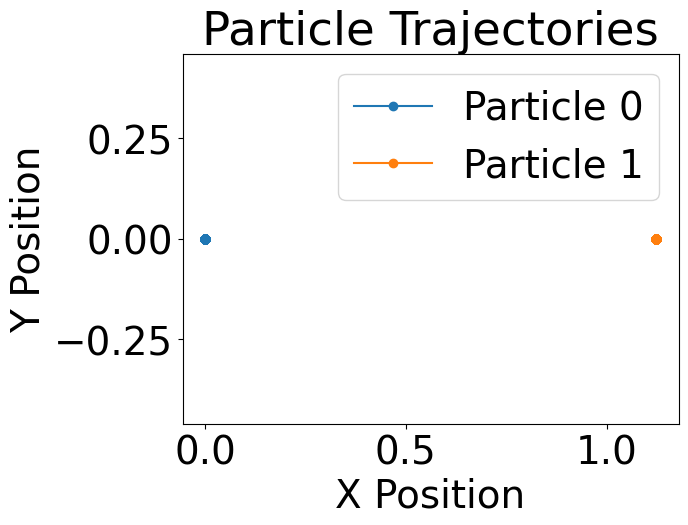

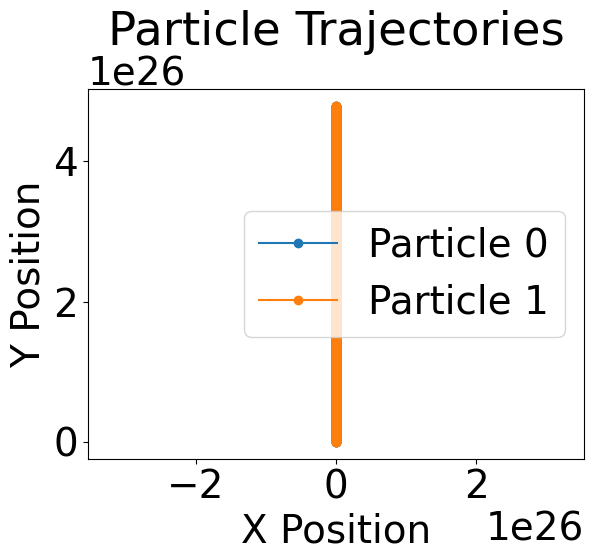

In [150]:
r_min = (2**(1/6)) * sigma


R1 = np.array([[0, 0], [r_min,0]]) 
v0 = np.array([[0,0],[0,0]])
traj1 = simulation(R1, v0, 1, .01, 10, 1, 1)
plot_traj(traj1)

R2 = np.array([[0,0], [r_min, 0]])
v1 = np.array([[0,0.5],[0,-0.5]])
traj2= simulation(R2, v1, 1, .01, 10, 1, 1)
plot_traj(traj2)

